In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import networkx as nx

In [ ]:
df = pd.read_csv('tags data.csv')

In [ ]:

df

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925
...,...,...,...
485,objective-c,xcode,43.418825
486,swift,xcode,48.620335
487,iphone,xcode,34.712865
488,ios,xcode,46.365091


In [ ]:
df.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [ ]:
df.notna().sum()

source    490
target    490
value     490
dtype: int64

In [ ]:
G = nx.Graph()

In [ ]:
for index, row in df.iterrows():
    G.add_edge(row["source"], row["target"], weight = row["value"])

Network Metrics

Some general info about the network are:

In [ ]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 245
Average degree:   4.2609


In [ ]:
def draw_graph(G,size):
    nodes = G.nodes()
    color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}
   
    pos = nx.drawing.spring_layout(G,k=0.80,iterations=60)
    plt.figure(figsize=size)
    nx.draw_networkx(G,pos=pos,edge_color='#FFDEA2')
    plt.show()

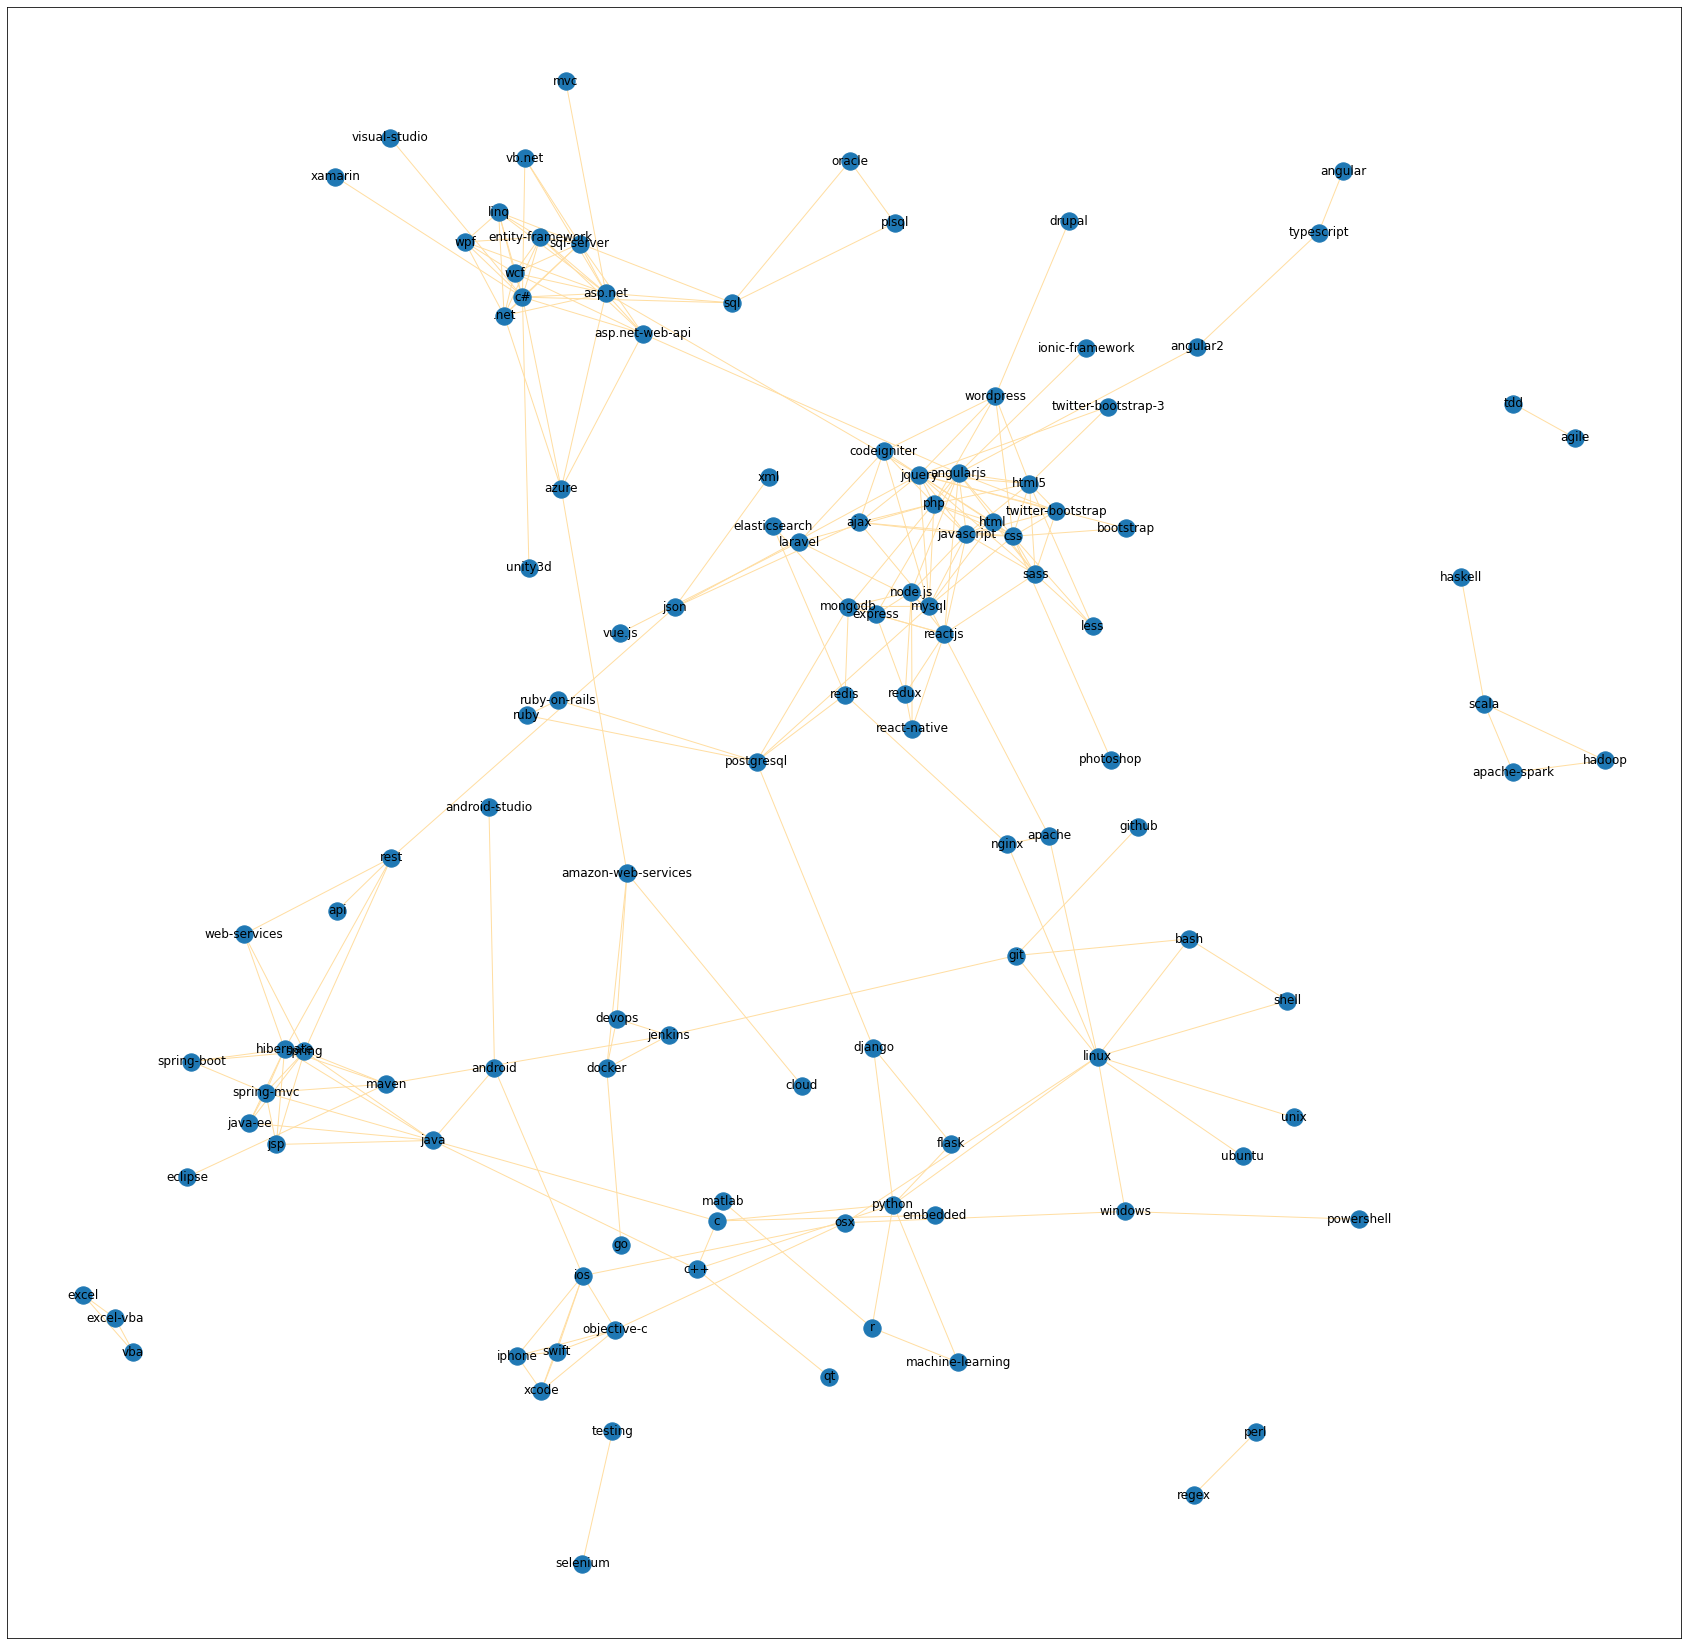

In [ ]:
draw_graph(G,size=(30,30))


# First - the most important tags in defining the domains that the resources belong to

Degree

We may see the network's degree distribution to understand the Average degree calculated above.

In [ ]:
import networkx as nx
mygraph = nx.Graph()

In [ ]:
mygraph = nx.from_pandas_edgelist(df, 'source', 'target')

In [ ]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(mygraph)

Centrality


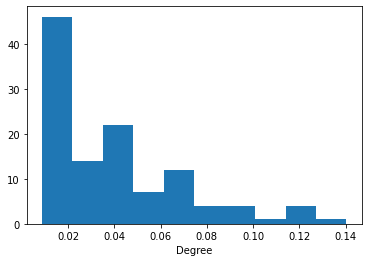

In [ ]:
deg_cent = list(nx.degree_centrality(G).values())
plt.hist(deg_cent)
print("Centrality")
plt.xlabel("Degree")
plt.show()

Shortest Path

It calculates the shortest possible series of nodes and edges that stand between any two nodes, something hard to see in large network visualizations. This measure is essentially finding friends-of-friends—if tag x is connected with y and w is connected with y, but not with x, then the shortest path between x and w is y. The Six Degrees of Kevin Bacon game, from which our project takes its name, is basically a game of finding shortest paths (with a path length of six or less) from Kevin Bacon to any other actor.

To calculate a shortest path, you’ll need to pass several input variables (information you give to a Python function): the whole graph, your source node, and your target node. Let’s find the shortest path between javascript and linux. 

In [ ]:
fell_wh = nx.shortest_path(G, source="javascript", target="linux")

print("Shortest path between javascript and linux:", fell_wh, "and the length of that path is", len(fell_wh)-1)

Shortest path between javascript and linux: ['javascript', 'mysql', 'apache', 'linux'] and the length of that path is 3


Since there is no shortest path between nodes of one component and nodes of another, nx.diameter() returns the “not connected” error. You can remedy this by first finding out if your Graph “is connected” (i.e. all one component) and, if not connected, finding the largest component and calculating diameter on that component alone. Here’s the code:

In [ ]:
print(nx.is_connected(G))

False


In [ ]:
components = nx.connected_components(G)
largest_component = max(components, key=len)
print("There are" , len(largest_component), "large components.")

There are 102 large components.


In [ ]:
components = nx.connected_components(G)
smallest_component = min(components, key=len)
print("There are" , len(smallest_component), "small components, which are", list(smallest_component))

There are 2 small components, which are ['agile', 'tdd']


In [ ]:
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 10


Centrality Measures

In network analysis, measures of the importance of nodes are referred to as centrality measures. Because there are many ways of approaching the question “Which nodes are the most important?” there are many different ways of calculating centrality. Here you’ll learn about three of the most common centrality measures: degree, betweenness centrality, and eigenvector centrality.

Degree is the simplest and the most common way of finding important nodes. A node’s degree is the sum of its edges. If a node has three lines extending from it to other nodes, its degree is three. Five edges, its degree is five. It’s really that simple. Since each of those edges will always have a node on the other end, you might think of degree as the number of people to which a given person is directly connected. The nodes with the highest degree in a social network are the people who know the most people. These nodes are often referred to as hubs, and calculating degree is the quickest way of identifying hubs.

In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [ ]:
print(G.nodes['javascript'])

{'degree': 12}


In [ ]:
print("Top 10 nodes by degree:")
for d in sorted_degree[:10]:
    print(d)


Top 10 nodes by degree:
('jquery', 16)
('c#', 14)
('css', 14)
('asp.net', 13)
('angularjs', 13)
('javascript', 12)
('mysql', 11)
('php', 10)
('html5', 10)
('linux', 10)


In [ ]:
from operator import itemgetter
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

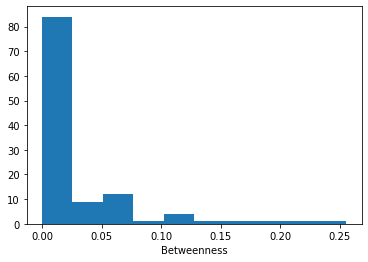

In [ ]:
bet_cent = list(nx.betweenness_centrality(G).values())
plt.hist(bet_cent)
plt.xlabel("Betweenness")
plt.show()

In [ ]:
closeness_dict = nx.closeness_centrality(G)
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')


In [ ]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by betweenness centrality:")
for b in sorted_betweenness[:10]:
    print(b[0],"%.4f" % b[1])


Top 10 nodes by betweenness centrality:
jquery 0.2555
linux 0.2084
mysql 0.1977
asp.net 0.1741
apache 0.1309
json 0.1232
angularjs 0.1229
rest 0.1137
python 0.1102
postgresql 0.0876


In [ ]:
top_level_communities = next(communities_generator)
top_level_communities

({'.net',
  'asp.net',
  'asp.net-web-api',
  'azure',
  'c#',
  'entity-framework',
  'linq',
  'mvc',
  'oracle',
  'plsql',
  'sql',
  'sql-server',
  'unity3d',
  'vb.net',
  'visual-studio',
  'wcf',
  'wpf',
  'xamarin'},
 {'agile', 'tdd'},
 {'ajax',
  'amazon-web-services',
  'android',
  'android-studio',
  'angular',
  'angular2',
  'angularjs',
  'apache',
  'api',
  'bash',
  'bootstrap',
  'c',
  'c++',
  'cloud',
  'codeigniter',
  'css',
  'devops',
  'django',
  'docker',
  'drupal',
  'eclipse',
  'elasticsearch',
  'embedded',
  'express',
  'flask',
  'git',
  'github',
  'go',
  'hibernate',
  'html',
  'html5',
  'ionic-framework',
  'ios',
  'iphone',
  'java',
  'java-ee',
  'javascript',
  'jenkins',
  'jquery',
  'json',
  'jsp',
  'laravel',
  'less',
  'linux',
  'machine-learning',
  'matlab',
  'maven',
  'mongodb',
  'mysql',
  'nginx',
  'node.js',
  'objective-c',
  'osx',
  'photoshop',
  'php',
  'postgresql',
  'powershell',
  'python',
  'qt',
  'r',


In [ ]:
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
prs = pagerank(mygraph)
{k: v for k, v in sorted(prs.items(), key=lambda item: item[1], reverse=True)}

{'.net': 0.011429881400234675,
 'agile': 0.008695652173913044,
 'ajax': 0.010252507675556941,
 'amazon-web-services': 0.010328160467189137,
 'android': 0.0077571105905048735,
 'android-studio': 0.003502255236105238,
 'angular': 0.00456601878559125,
 'angular2': 0.005845058885372686,
 'angularjs': 0.019558438311519058,
 'apache': 0.0066549678699685455,
 'apache-spark': 0.00855404749783867,
 'api': 0.003086675546141061,
 'asp.net': 0.019043369802028334,
 'asp.net-web-api': 0.01026193370475977,
 'azure': 0.008563616287041475,
 'bash': 0.008132351067896787,
 'bootstrap': 0.0036720105851927526,
 'c': 0.01023680338030795,
 'c#': 0.02238257198872127,
 'c++': 0.01023680338030795,
 'cloud': 0.0034993779081418865,
 'codeigniter': 0.009121117745676767,
 'css': 0.01971234160672407,
 'devops': 0.007969086479558803,
 'django': 0.007558314804984081,
 'docker': 0.010986231712160273,
 'drupal': 0.0026630489729001696,
 'eclipse': 0.0031320151695322035,
 'elasticsearch': 0.004485224040798383,
 'embedded'

# Second - DIFFERENT COMMUNITIES OF TAG

In [ ]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(mygraph)
printed_set = []
for i in range(10):
    next_level_communities = next(communities_generator)
    lengths = [len(x) for x in next_level_communities]
    skip = np.argmax(lengths)
    for indx,community in enumerate(next_level_communities):
        if skip != indx and next_level_communities[indx] not in printed_set:
            print(next_level_communities[indx])
            printed_set.append(next_level_communities[indx])

{'sql', '.net', 'asp.net', 'c#', 'mvc', 'wcf', 'sql-server', 'unity3d', 'visual-studio', 'oracle', 'asp.net-web-api', 'wpf', 'azure', 'entity-framework', 'vb.net', 'linq', 'plsql', 'xamarin'}
{'agile', 'tdd'}
{'haskell', 'apache-spark', 'scala', 'hadoop'}
{'vba', 'excel', 'excel-vba'}
{'perl', 'regex'}
{'selenium', 'testing'}
{'javascript', 'vue.js', 'typescript', 'mysql', 'less', 'laravel', 'node.js', 'twitter-bootstrap-3', 'bootstrap', 'ruby-on-rails', 'postgresql', 'angularjs', 'jquery', 'drupal', 'photoshop', 'html5', 'php', 'wordpress', 'react-native', 'angular2', 'ajax', 'mongodb', 'xml', 'elasticsearch', 'express', 'css', 'reactjs', 'redis', 'json', 'twitter-bootstrap', 'angular', 'html', 'sass', 'redux', 'ionic-framework', 'ruby', 'codeigniter'}
{'powershell', 'bash', 'amazon-web-services', 'github', 'unix', 'git', 'nginx', 'iphone', 'devops', 'xcode', 'go', 'docker', 'ubuntu', 'shell', 'osx', 'objective-c', 'jenkins', 'ios', 'windows', 'android', 'cloud', 'linux', 'swift', 'an

In [ ]:
sorted_c = sorted(list(nx.find_cliques(G)),key=len)

In [ ]:
nodes = set()
for nodelist in sorted_c[-4:-1]:
    for node in nodelist:
        nodes.add(node)

In [ ]:
max_c = G.subgraph(nodes)

In [ ]:
print(nx.info(max_c))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 43
Average degree:   6.1429


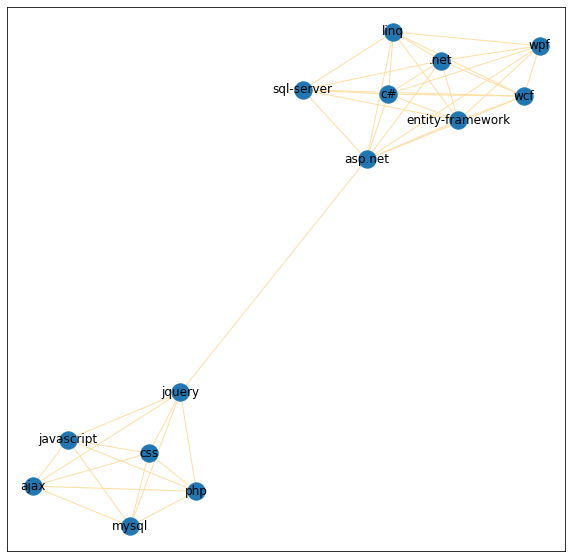

In [ ]:
draw_graph(max_c,size=(10,10))

# Third Clustering

In [ ]:
def spectral_clustering(mygraph,num_evs):
    ordered_nodes=sorted(list(mygraph.nodes()))
    L=nx.laplacian_matrix(mygraph,ordered_nodes)
    eig_val, eig_vec = np.linalg.eig(L.todense())
    idx = eig_val.argsort()[1:num_evs+1]   
    eigenValues = eig_val[idx]
    eigenVectors = eig_vec[:,idx]
    print(eigenValues)
    sec_eigen_v = eigenVectors[:,0].reshape(1,-1).tolist()[0]
    print(sec_eigen_v)
    myDataLists = []
    for i in range(1,num_evs+1):
        myDataLists.append(eig_vec[:,i].reshape(1,-1).tolist()[0])

    plt.hist(sec_eigen_v)
    plt.show()
    my_labels = [np.sign(x) for x in sec_eigen_v]
    for node,node_title in enumerate(ordered_nodes):
        mygraph.nodes[node_title]["segment"]=my_labels[node]
    nx.draw(mygraph,with_labels=True,nodelist=ordered_nodes,node_color=[mygraph.nodes[node]['segment'] for node in ordered_nodes],cmap = plt.cm.autumn)
    plt.show()
    return np.array(myDataLists)

[-4.14702167e-16+0.00000000e+00j -2.75621678e-16-3.01548914e-16j
 -2.75621678e-16+3.01548914e-16j  2.12599018e-16+0.00000000e+00j
  7.85005824e-16+0.00000000e+00j  7.85295607e-02+0.00000000e+00j
  1.40529779e-01+0.00000000e+00j  1.92862253e-01+0.00000000e+00j]
[(-0.05990945720492369+0j), (0.22721387854461828+0j), (-0.059909457204925284+0j), (-0.059909457204923036+0j), (-0.0599094572049274+0j), (-0.059909457204927886+0j), (-0.0599094572049254+0j), (-0.059909457204925125+0j), (-0.059909457204925104+0j), (-0.05990945720492526+0j), (-0.23567394239721315+0j), (-0.05990945720492608+0j), (-0.059909457204923654+0j), (-0.05990945720492375+0j), (-0.059909457204923355+0j), (-0.059909457204925964+0j), (-0.059909457204925326+0j), (-0.05990945720492636+0j), (-0.05990945720492346+0j), (-0.0599094572049263+0j), (-0.059909457204922446+0j), (-0.05990945720492516+0j), (-0.05990945720492509+0j), (-0.059909457204923834+0j), (-0.059909457204925715+0j), (-0.05990945720492371+0j), (-0.059909457204924986+0j), 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


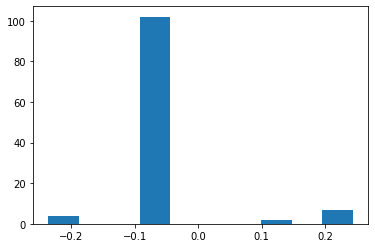

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


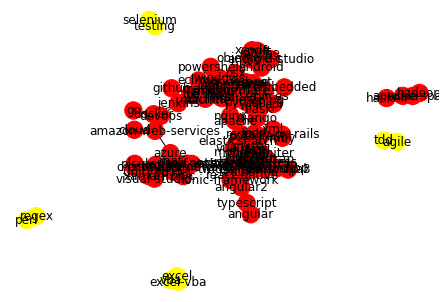

In [ ]:
data_for_clustering = spectral_clustering(mygraph,8) 

Bridges

A bridge is a connection between two nodes that if it were to be deleted it would cause the total division of th main component into two separate components.

In [ ]:
list(nx.bridges(G))

[('asp.net', 'mvc'),
 ('c#', 'xamarin'),
 ('c#', 'unity3d'),
 ('c#', 'visual-studio'),
 ('tdd', 'agile'),
 ('css', 'photoshop'),
 ('json', 'xml'),
 ('cloud', 'amazon-web-services'),
 ('docker', 'go'),
 ('android', 'android-studio'),
 ('typescript', 'angular'),
 ('typescript', 'angular2'),
 ('angular2', 'angularjs'),
 ('angularjs', 'ionic-framework'),
 ('linux', 'unix'),
 ('linux', 'ubuntu'),
 ('scala', 'haskell'),
 ('rest', 'api'),
 ('git', 'github'),
 ('c++', 'qt'),
 ('c', 'embedded'),
 ('laravel', 'vue.js'),
 ('wordpress', 'drupal'),
 ('maven', 'eclipse'),
 ('windows', 'powershell'),
 ('r', 'matlab'),
 ('regex', 'perl'),
 ('testing', 'selenium')]

# Fourth - propose a method for recommending tags to a user that is tagging a resource with one of more existing tags

Language Specific Subgraph And Cliques

For each programming language there's a tag in the network. E.g 'python' will refer to the python language. So we can check the cliques that contains that node. We can also visualize the subgraph containing that node and all its neighbors with a specifed depth range.

For example, we can check the ego network for java with radius 2, which means that we get the subgraph containing java and all it's direct neighbors which are 1 edge away from python and also the nodes which are 2 steps away from java.

These subgraphs called Ego networks and can be used for checking shortest paths or generally conducting analysis of who is connected to whom, but cliques are helpful because it shows us the data in a more granular way.


In [ ]:
fullstack = ['html','css', 'javascript', 'python', 
             'mongodb', 'express', 'node.js', 'angular']

In [ ]:
fullstackDeveloper = []
for f in fullstack:
    neighbors = G.neighbors(f)
    fullstackDeveloper.extend(neighbors)

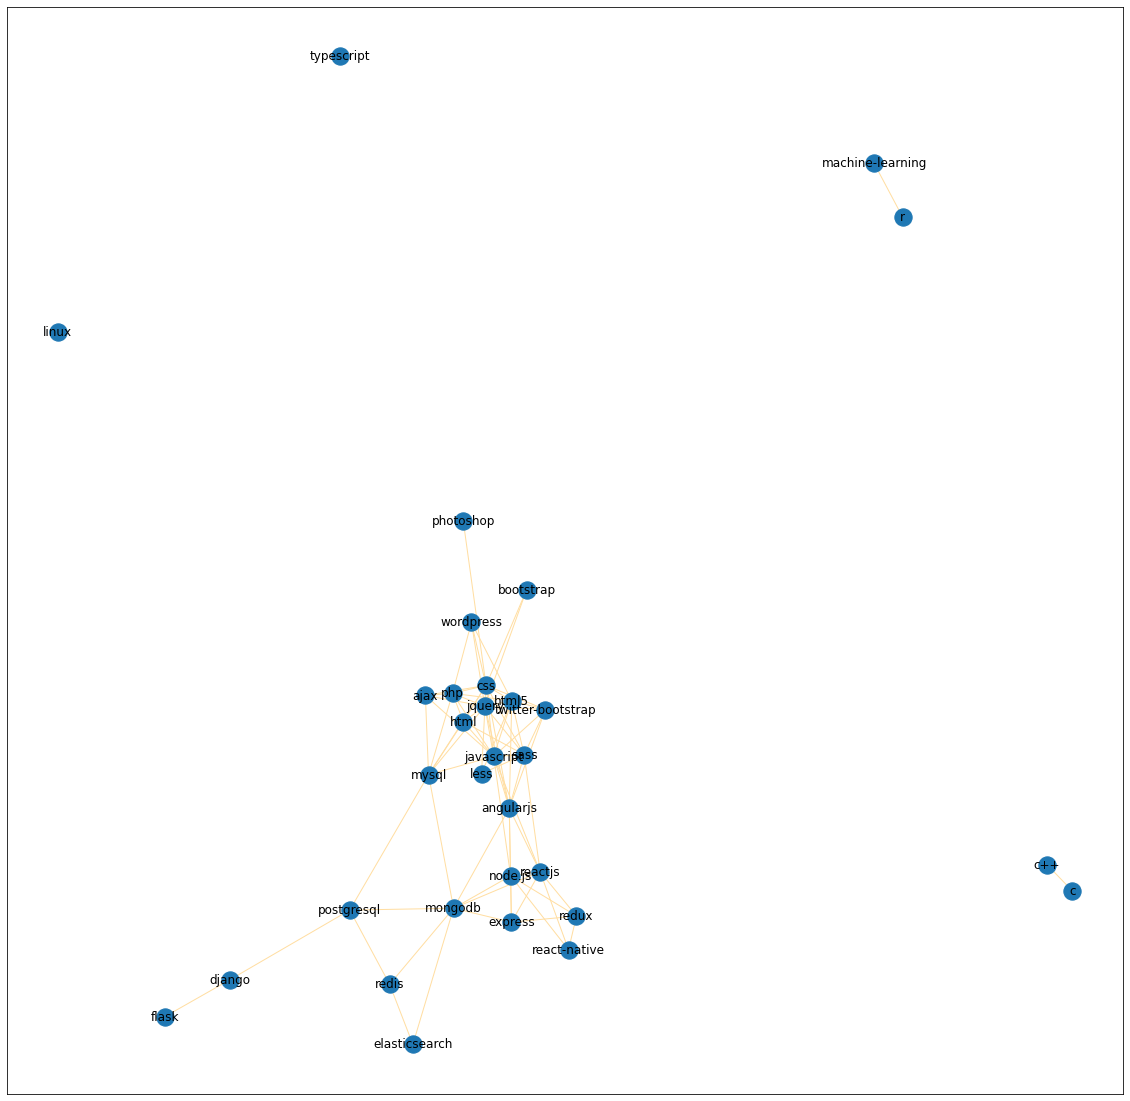

In [ ]:
fg = G.subgraph(set(fullstackDeveloper))
draw_graph(fg,size=(20,20))